<a href="https://colab.research.google.com/github/sumankmaiti/All-in-one/blob/main/depthestimation_of_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade mxnet


     |████████████████████████████████| 46.9 MB 43 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# New Section

In [ ]:
!pip install --upgrade gluoncv


     |████████████████████████████████| 1.3 MB 15.0 MB/s 


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import mxnet as mx
from mxnet.gluon.data.vision import transforms
import gluoncv
import PIL.Image as pil
ctx = mx.cpu(0)

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.9.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


this block is for loading the image and preproccesing it
we are convertin the image to rgb and resizing it according to the input size for th model which is (192 * 640)


Text(0.5, 1.0, 'original')

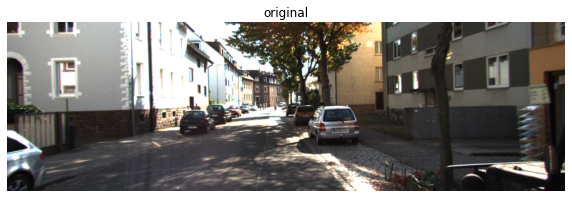

In [ ]:
img = pil.open('/content/test4.png').convert('RGB')
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1, 1)
plt.imshow(img)
plt.axis('off')
plt.title("original")

In [ ]:
original_width, original_height = img.size
feed_height = 192
feed_width = 640
img = img.resize((feed_width, feed_height), pil.LANCZOS)
img = transforms.ToTensor()(mx.nd.array(img)).expand_dims(0).as_in_context(context=ctx)

next block we are downloading the model


In [ ]:
#this block is meant to run only once
model = gluoncv.model_zoo.get_model('monodepth2_resnet18_kitti_mono_640x192',pretrained_base=False, ctx=ctx, pretrained=True)

70344KB [00:03, 23145.20KB/s]                           


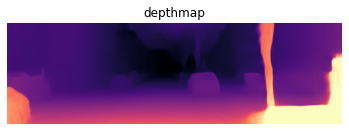

In [ ]:
outputs = model.predict(img)
disp = outputs[("disp", 0)]
disp_resized = mx.nd.contrib.BilinearResize2D(disp, height=original_height, width=original_width)
disp_resized_np = disp_resized.squeeze().as_in_context(mx.cpu()).asnumpy()
vmax = np.percentile(disp_resized_np, 95)
normalizer = mpl.colors.Normalize(vmin=disp_resized_np.min(), vmax=vmax)
mapper = cm.ScalarMappable(norm=normalizer, cmap='magma')
colormapped_im = (mapper.to_rgba(disp_resized_np)[:, :, :3] * 255).astype(np.uint8)
im = pil.fromarray(colormapped_im)
im.save('test_output.png')


disp_map = mpimg.imread('test_output.png')
fig.add_subplot(2,1, 2)
  
# showing image
plt.imshow(disp_map)
plt.axis('off')
plt.title("depthmap")
# plt.imshow(disp_map)
plt.show()